# Flussbilanzanalyse mit U. maydis - Modell : Simulation und Verhältnisanalyse mit Glucose und Co-Feed von Acetat und Formiat zur CO2-negativen/neutralen Prozessgestaltung

In [1]:
from os.path import join
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from cobra import Model, Reaction, Metabolite
from cobra.io import read_sbml_model

In [2]:
ModelFile = join('..','model','iCL1079.xml')
model=read_sbml_model(ModelFile)

model.compartments

{'e': 'Extracellular space',
 'c': 'Cytoplasm',
 'm': 'Mitochondrial Lumen',
 'p': 'Mitochondrial Intermembrane Space'}

In [3]:
model.reactions.query('h_e')
model.add_boundary(metabolite=model.metabolites.h_e, type='exchange', reaction_id='EX_h_e', lb=0, ub=0)

Reaction identifier,EX_h_e
Name,H+ exchange
Memory address,0x07fa647bfafa0
Stoichiometry,h_e --> H+ -->
GPR,
Lower bound,0
Upper bound,0


 ## Reactions

### acetate

In [ ]:
print('acetate reactions in cytoplasm')
for reaction in model.metabolites.ac_c.reactions:
    print(reaction.id, reaction, reaction.name)

print('')
print('acetate reactions in extracellular')
for reaction in model.metabolites.ac_e.reactions:
    print(reaction.id, reaction, reaction.name)    
# for reaction in model.metabolites.co2_c.reactions:
#     print(reaction.id, reaction, reaction.name)

# for reaction in model.metabolites.co2_e.reactions:
#     print(reaction.id, reaction, reaction.name)

### formate

In [ ]:
print('formate reactions in cytoplasm')
for reaction in model.metabolites.for_c.reactions:
    print(reaction.id, reaction, reaction.name)
    
    
print('')
print('formate reactions in extracellular')
for reaction in model.metabolites.for_e.reactions:
    print(reaction.id, reaction, reaction.name)

In [4]:
model.summary()
# print(model.objective)
# model.optimize()

Metabolite,Reaction,Flux,C-Number,C-Flux
co2_e,EX_co2_e,2.959,1,4.70%
glc__D_e,EX_glc__D_e,10,6,95.30%
nh4_e,EX_nh4_e,2.717,0,0.00%
o2_e,EX_o2_e,3.174,0,0.00%
pi_e,EX_pi_e,0.4887,0,0.00%
so4_e,EX_so4_e,0.04051,0,0.00%
Metabolite,Reaction,Flux,C-Number,C-Flux
fum_e,EX_fum_e,-0.2366,4,2.31%
h2o_e,EX_h2o_e,-13.58,0,0.00%
mal__L_e,EX_mal__L_e,-10.02,4,97.69%


In [5]:
medium=model.medium
with model:
    medium['EX_glc__D_e']= 5#7.69
#     medium['EX_ac_e']=10
    model.medium=medium
    solution=model.optimize()
    print(solution.fluxes['BIOMASS_REACTION'])
    print(model.summary())

0.24699219084790194
Objective
1.0 BIOMASS_REACTION = 0.24699219084790214

Uptake
------
Metabolite    Reaction    Flux  C-Number C-Flux
     co2_e    EX_co2_e   1.479         1  4.70%
  glc__D_e EX_glc__D_e       5         6 95.30%
     nh4_e    EX_nh4_e   1.359         0  0.00%
      o2_e     EX_o2_e   1.587         0  0.00%
      pi_e     EX_pi_e  0.2443         0  0.00%
     so4_e    EX_so4_e 0.02025         0  0.00%

Secretion
---------
Metabolite    Reaction    Flux  C-Number C-Flux
     fum_e    EX_fum_e -0.1183         4  2.31%
     h2o_e    EX_h2o_e  -6.792         0  0.00%
  mal__L_e EX_mal__L_e  -5.011         4 97.69%



In [6]:
Glucose_list = np.array([5,7,9,11,13,15])
Acetate_list = np.array([0,2,4,6,8,10])
# medium_list = np.array([[x,y] for x in Glucose_list for y in Acetate_list])
Glc_list, Ace_list = np.meshgrid(Glucose_list, Acetate_list)
medium_list = np.transpose(np.reshape(np.array([Glc_list, Ace_list]),(2,-1)))
# print(medium_list)

Text(0, 0.5, 'Ace in mmol/gCDW/h')

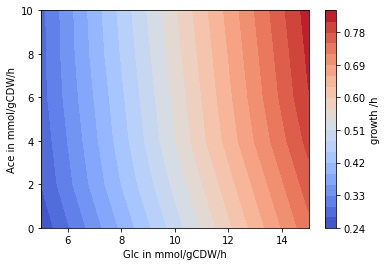

In [7]:
Bio_list = list()
for z in medium_list:
    x=z[0]
    y=z[1]
    with model:
        medium['EX_glc__D_e']=x
        medium['EX_ac_e']=y
        model.medium=medium
        solution=model.optimize()
        Bio_list.append(solution.fluxes['BIOMASS_REACTION'])
        
Bio_list = np.reshape(np.array(Bio_list),(-1,1))
Z = np.reshape(Bio_list,(6,6))
plt.contourf(Glc_list, Ace_list, Z, 20, cmap='coolwarm')
plt.colorbar(label='growth /h')
plt.xlabel('Glc in mmol/gCDW/h')
plt.ylabel('Ace in mmol/gCDW/h')
# plt.savefig('Umay-Glc-Ace_default.png')

## forcing proton export

Text(0, 0.5, 'Ace in mmol/gCDW/h')

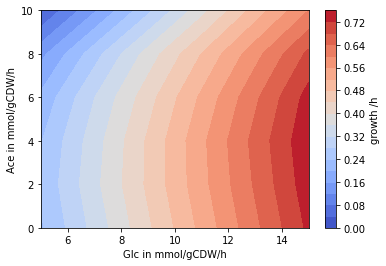

In [9]:
Bio_list = list()
for z in medium_list:
    x=z[0]
    y=z[1]
    with model:
        medium['EX_glc__D_e']=x
        medium['EX_ac_e']=y
        model.medium=medium
        model.reactions.EX_h_e.lower_bound = np.power(1.33,y)
        solution=model.optimize()
        Bio_list.append(solution.fluxes['BIOMASS_REACTION'])
        
Bio_list = np.reshape(np.array(Bio_list),(-1,1))
Z = np.reshape(Bio_list,(6,6))
plt.contourf(Glc_list, Ace_list, Z, 20, cmap='coolwarm')
plt.colorbar(label='growth /h')
plt.xlabel('Glc in mmol/gCDW/h')
plt.ylabel('Ace in mmol/gCDW/h')
# plt.savefig('Umay-Glc-Ace_InhHigh.png')